## 알고리즘 예제 5.1, 2

문제 정의 : 병합 정렬, 병합 알고리즘(정렬된 두 리스트의 병합)

알고리즘 설명 

병합 정렬 함수 (merge_sort)

1. 리스트 A를 오름차순으로 정렬하는 함수이다. 

2. 정렬할 항목이 2개 이상인 경우 데해서만 분할-정복을 진행한다. 

3. 리스트를 균등하게 분할할 인덱스를 계산하고 왼쪽 부분 리스트와 오른쪽 부분 리스트를 각각 독립적으로 병합 정렬한다. 

4. 정렬된 두 리스트를 병합해 하나의 정렬된 리스트를 만든다. 

병합 알고리즘(정렬된 두 리스트의 병합)

1. 각각 정렬된 왼쪽 부분 리스트와 오른쪽 부분 리스트를 하나의 리스트로 병합하는 함수이다. 

2. 왼쪽, 오른쪽, 임시리스트를 초기화한다.

3. 한 쪽의 부분 리스트가 모두 처리될 때까지 반복한다. 

4. 한쪽의 부분 리스트에 남아 있는 모든 레코드를 임시 리스트 sorted로 일괄 복사한다. ( 슬라이스 기능 사용 )

5. 병합이 끝나면 병합 결과를 저장한 임시 리스트 sorted를 원래의 리스트 A에 복사한다.

손으로 푼 예제 :

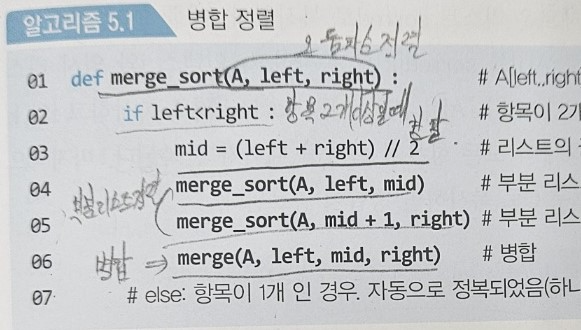

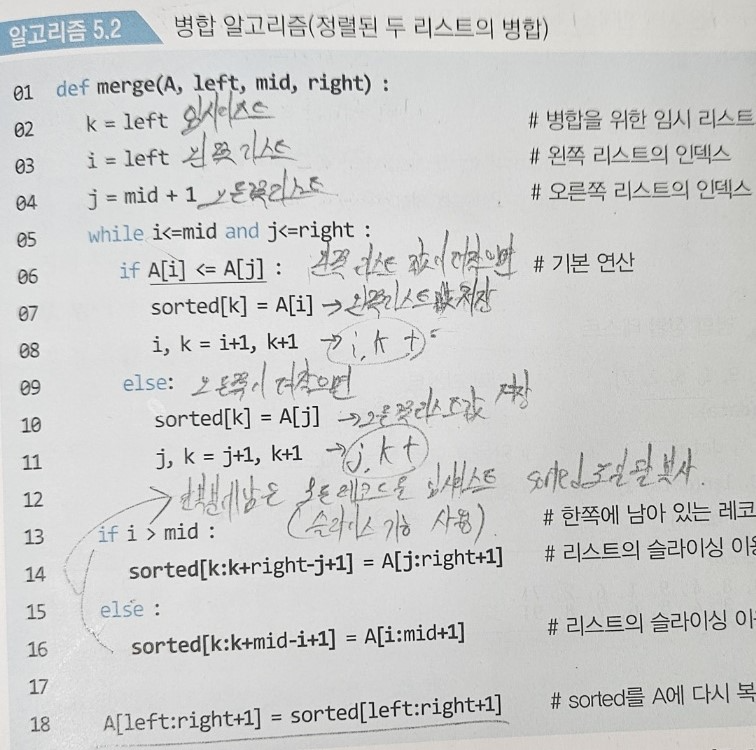

코드 개요 : 병합 정렬(merge_sort(A, left, right)), 병합 알고리즘-정렬된 두 리스트의 병합(merge(A, left, mid, right))

입력 변수 : data = [ 1, 3, 4, 2, 5, 10, 8, 9, 7, 6 ] (입력리스트), sorted = [0] * len(data) (길이가 len(data)인 임시리스트)

출력 변수 : 기존 data, 병합 정렬(merge_sort(data, 0, len(data)-1))된 data

In [4]:
#알고리즘 코드

def merge_sort(A, left, right) :
    if left<right :
        mid = (left + right) // 2
        merge_sort(A, left, mid)
        merge_sort(A, mid+1, right)
        merge(A, left, mid, right)

def merge(A, left, mid, right) :
    k = left
    i = left
    j = mid + 1 
    while i<=mid and j<=right :
        if A[i] <= A[j] :
            sorted[k] = A[i]
            i, k = i+1, k+1
        else :
            sorted[k] = A[j]
            j, k = j+1, k+1

    if i > mid :
        sorted[k:k+right-j+1] = A[j:right+1]
    else :
        sorted[k:k+mid-i+1] = A[i:mid+1]

    A[left:right+1] = sorted[left:right+1]

In [5]:
#테스트 코드 

data = [ 1, 3, 4, 2, 5, 10, 8, 9, 7, 6 ]
sorted = [0] * len(data)
print("Original  :", data)
merge_sort(data, 0, len(data)-1)
print("MergeSort :", data)

Original  : [1, 3, 4, 2, 5, 10, 8, 9, 7, 6]
MergeSort : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


수행 결과

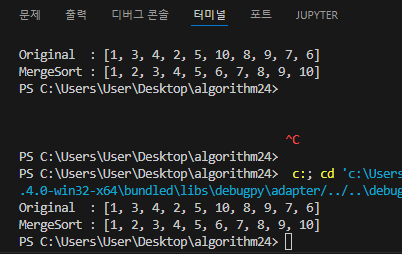

복잡도 분석

병합 정렬은 입력 데이터의 구성에 상관없이 동일한 시간에 정렬이 완료된다. 따라서 최악, 평균, 최선의 경우를 나누어 생각할 필요가 없다. 병합 정렬은 순환 호출 구조로 되어 있다. 따라서 레코드의 개수 n이 2의 거듭제곱이라고 가정할때, n = 2^3인 경우 부분배열 크기가 2^3 -> 2^2 -> 2^1 -> 2^0 순으로 줄어들어 순환 호출의 깊이가 3임을 알 수 있다. 그러므로 일반식으로 나타냈을 때 2^k = 2^k-1 -> ... -> 2^0이 되어 순환 호출의 깊이는 k가 된다. 이때, k = log2(n)이 된다. O(log2(n))